# Data Analysis: 

# Cyclistic Bike-Share Analysis Case Study




In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.

Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.

Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the pricing flexibility helps Cyclistic attract more customers, Moreno believes that maximizing the number of annual members will be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a very good chance to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic program and have chosen Cyclistic for their mobility needs.

The goal is to design marketing strategies aimed at converting casual riders into annual members. In order to do that, however, the marketing analyst team needs to better understand how annual members and casual riders differ, why casual riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are interested in analyzing the Cyclistic historical bike trip data to identify trends.


# Ask

The question that will guide this analysis is:

How do annual members and casual riders use Cyclistic bikes differently?

## What is the problem to solve? 

The purpose of this analysis is to give insights on how to convert
casual riders into annual members to increase revenue, and based on
those findings, propose actions for the marketing director.

By focusing in understanding differences between members and casual
riders this analysis will recommend marketing strategies oriented to
convert casual members into annual members

## Key tasks 

The main business task is to convert casual riders into annual members
to increase revenue.

### Key stakeholders

**Lily Moreno:** The director of marketing. She is responsible for the
development of campaigns and initiatives to promote the bike-share
program.

**Cyclistic marketing analytics team:** The team will answer the other 2
questions that Lily Moreno requested:

1.  Why would casual riders buy Cyclistic annual memberships?

2.  How can Cyclistic use digital media to influence casual riders
    to become members?

As a result, the insights of this analysis will need to be merged with
their perspectives.

**Cyclistic executive team:** The are the final decision makers and the
marketing needs to give to the marketing director all the data and
insights that can support her recommendations.

# Prepare

The data used for this analysis was provided by Cyclistic’s historical
trip data. As a Cyclistic is a fictitious company based in Chicago, the
data was provided probably by Divvy Bikes which is a real company that
offers the same services in Chicago.

The data can be accessed in the following link:

<https://divvy-tripdata.s3.amazonaws.com/index.html>

The data is organized in separate files, one for each month. It’s
delivered in a .csv (comma-separated values) format.

## Data reliability

The data obtained looks that is not biased, but that cannot be confirmed
by the information received, is not possible to know if it has been
filtered for example.

The data is original, because is very precise on location and time and
dates. Even though the data has good information, is not possible to
track unique users. In order to extract more insights, but is
sufficient. Is a dataset that is updated monthly so it’s current.

The dataset is public and has been made available by Motivate
International Inc. Under this license personally identifiable
information is banned.

Because its public nature the dataset doesn’t contain any sensible
information.

The information that is going to be used goes from january 2022 to december 2022.

# Load files

In [1]:
#import libraries needed for loading data 
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
import warnings
warnings.filterwarnings('ignore')

Here is the loading process:

In [2]:
jan22 = pd.read_csv('C:\\Users\\david\\Notebooks\\Capstone project\\202201-divvy-tripdata.csv')
feb22 = pd.read_csv('C:\\Users\\david\\Notebooks\\Capstone project\\202202-divvy-tripdata.csv')
mar22 = pd.read_csv('C:\\Users\\david\\Notebooks\\Capstone project\\202203-divvy-tripdata.csv')
apr22 = pd.read_csv('C:\\Users\\david\\Notebooks\\Capstone project\\202204-divvy-tripdata.csv')
may22 = pd.read_csv('C:\\Users\\david\\Notebooks\\Capstone project\\202205-divvy-tripdata.csv')
jun22 = pd.read_csv('C:\\Users\\david\\Notebooks\\Capstone project\\202206-divvy-tripdata.csv')
jul22 = pd.read_csv('C:\\Users\\david\\Notebooks\\Capstone project\\202207-divvy-tripdata.csv')
aug22 = pd.read_csv('C:\\Users\\david\\Notebooks\\Capstone project\\202208-divvy-tripdata.csv')
sep22 = pd.read_csv('C:\\Users\\david\\Notebooks\\Capstone project\\202209-divvy-publictripdata.csv')
oct22 = pd.read_csv('C:\\Users\\david\\Notebooks\\Capstone project\\202210-divvy-tripdata.csv')
nov22 = pd.read_csv('C:\\Users\\david\\Notebooks\\Capstone project\\202211-divvy-tripdata.csv')
dec22 = pd.read_csv('C:\\Users\\david\\Notebooks\\Capstone project\\202212-divvy-tripdata.csv')

In [3]:
df1 = pd.concat([jan22,feb22,mar22,apr22,may22,jun22,jul22,aug22,sep22, oct22, nov22, dec22], ignore_index = True)

This is how the data is organized:

In [4]:
df1.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member


This is the table description:


|Variable| description |
|:-------------------|:---------------------------------------------------------|
|ride_id:	|Unique key|
|rideable_type:	|Has 3 possible values: classic, electric and docked bike. |
|started_at:	|Date and time of the trip start |
|ended_at:	|Date and time of the trip end |
|start_station_name:	|Name of the start station|
|start_station_id:	|id of start station|
|end_station_name:	|id of end station|
|end_station_id:	|Id of the start station|
|start_lat:	|Latitude of start station|
|start_lng:	|Longitude of start station|
|end_lat:	|Latitude of end station|
|end_lng:	|Longitude of end station|
|member_casual:	|Type of membership. Two values are possible casual and member|

Note: Docked bikes are bike for people with disabilities and attach to wheelchairs.

In [5]:
df1.size

73680321

The size of the dataset is 73.680.321 records.

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5667717 entries, 0 to 5667716
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 562.1+ MB


# Process

Because the size of the dataset and online documentation, Python is the language used for this analysis.

All the data will be manipulated inside this Jypyter notebook to ensure integrity. In this analysis also Anaconda - Data Science platform - was installed in my personal computer to perform all  the calculations.

To clean this dataset, the first step is dropping columns 'start_station_id', 'end_station_id that have no value for this analysis.

In [7]:
df1 = df1.drop(columns=['start_station_id', 'end_station_id'])

And then look for null values:

In [8]:
df1.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    833064
end_station_name      892742
start_lat                  0
start_lng                  0
end_lat                 5858
end_lng                 5858
member_casual              0
dtype: int64

Because null station names are close to 16% of the dataset, it is better to drop just null coordinates values that are a small percentage and keep the null stations rows with a 'Not available' label. 

Is important to notice that latitude and longitude coordinates, differ a little for the same station.

In [9]:
# dropping the rows having NaN values and reseting index
df1 = df1.dropna(subset=['end_lat'])
df1 = df1.reset_index(drop = True)

In [10]:
df1[['start_station_name', 'end_station_name']] = df1[['start_station_name', 'end_station_name']].fillna('Not available')

In [11]:
df1.isnull().sum() #check null values

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
end_station_name      0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

In [12]:
# change data type for started_at and ended_at from object to date and time
df1['started_at'] = df1['started_at'].astype('datetime64')
df1['ended_at'] = df1['ended_at'].astype('datetime64')

In [13]:
df1.size

62280449

In [14]:
#dropping trips with 0 time

df1 = df1.drop(df1[df1['ended_at']-df1['started_at'] == pd.Timedelta(0)].index)

In [15]:
df1.size

62275708

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5661428 entries, 0 to 5661858
Data columns (total 11 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   end_station_name    object        
 6   start_lat           float64       
 7   start_lng           float64       
 8   end_lat             float64       
 9   end_lng             float64       
 10  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(5)
memory usage: 518.3+ MB


The next step is create a new column with the time that each trip took, and remove outliers that lie more than 3 standard deviations away from the mean.

In [17]:
df1['ride_length'] = ((df1['ended_at'] - df1['started_at'])/pd.Timedelta(minutes=1)).round(2)

In [18]:
mean = df1['ride_length'].mean()
sd = df1['ride_length'].std()
df1 = df1[(df1['ride_length'] <= mean+(3*sd))]

It's time to calculate the distance. for this analysis haversine calculations will be used, assuming a straight line beetween point on a sphere of the size of planet earth. This calculation is not entirely accurate, but for short distances is a good estimator. 

For more info go to:

https://towardsdatascience.com/heres-how-to-calculate-distance-between-2-geolocations-in-python-93ecab5bbba4

Although the distance calculated is a straight line, the real distance will be longer, because cyclists travel between streets. I assume for this analysis that the calculation is consistent for all stations, and are a good estimates. 

In [19]:
# A function to calculate distance

def haversine_distance(lat1, lon1, lat2, lon2):
   r = 6371
   phi1 = np.radians(lat1)
   phi2 = np.radians(lat2)
   delta_phi = np.radians(lat2 - lat1)
   delta_lambda = np.radians(lon2 - lon1)
   a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *  np.sin(delta_lambda / 2)**2
   res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
   return np.round(res, 2)

In [20]:
distances_km = []
for row in df1.itertuples(index=False):
   distances_km.append(
       haversine_distance(row.start_lat, row.start_lng, row.end_lat, row.end_lng)
          )
df1['distance_km'] = distances_km

Now, let´s tranform the start date into months, days and hours:

In [21]:
# Add a column with the month of the year
df1['year'] = df1['started_at'].dt.year

cats1 = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df1['month'] = df1['started_at'].dt.month_name()
df1['month'] = df1['month'].astype(CategoricalDtype(categories=cats1, ordered=False))

In [22]:
# Add a column with the day of the week
cats2 = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df1['day_of_week'] = df1['started_at'].dt.day_name()
df1['day_of_week'] = df1['day_of_week'].astype(CategoricalDtype(categories=cats2, ordered=False))

In [23]:
# Add a column with the hour of the day
df1['hour'] = df1['started_at'].dt.hour
df1 = df1.astype({'year':'int16', 'hour':'int8'})

This is the clean and modified dataset. 

In [24]:
df1.tail()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,distance_km,year,month,day_of_week,hour
5661854,43ABEE85B6E15DCA,classic_bike,2022-12-05 06:51:04,2022-12-05 06:54:48,Sangamon St & Washington Blvd,Peoria St & Jackson Blvd,41.883165,-87.651100,41.877642,-87.649618,member,3.73,0.63,2022,December,Monday,6
5661855,F041C89A3D1F0270,electric_bike,2022-12-14 17:06:28,2022-12-14 17:19:27,Bernard St & Elston Ave,Seeley Ave & Roscoe St,41.949980,-87.714019,41.943403,-87.679618,member,12.98,2.94,2022,December,Wednesday,17
5661856,A2BECB88430BE156,classic_bike,2022-12-08 16:27:47,2022-12-08 16:32:20,Wacker Dr & Washington St,Green St & Madison St,41.883143,-87.637242,41.881859,-87.649264,member,4.55,1.01,2022,December,Thursday,16
5661857,37B392960E566F58,classic_bike,2022-12-28 09:37:38,2022-12-28 09:41:34,Sangamon St & Washington Blvd,Peoria St & Jackson Blvd,41.883165,-87.651100,41.877642,-87.649618,member,3.93,0.63,2022,December,Wednesday,9
5661858,2DD1587210BA45AE,classic_bike,2022-12-09 00:27:25,2022-12-09 00:35:28,Southport Ave & Waveland Ave,Seeley Ave & Roscoe St,41.948150,-87.663940,41.943403,-87.679618,casual,8.05,1.40,2022,December,Friday,0


# Analyze

This phase of the whole analysis involve understanding data. To perform this end, we will rely on graphs. The idea behind this is to find patternsa and insights that will be the fundation of our final recomendations.

In [25]:
#Import graphic lybraries
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#import plotly.graph_objects as go
init_notebook_mode(connected=True)

The analysis will be done by year, month, day of the week and hour of the day. 

# Yearly Analysis (2022)

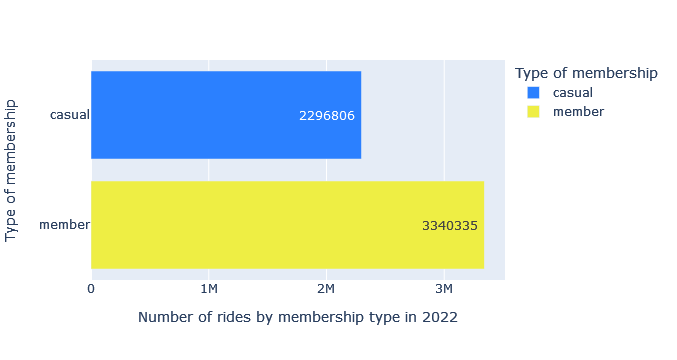

In [26]:
# Number of rides by year
fig_1 = round(df1.groupby('member_casual', as_index=False).count())

px.bar(fig_1, y = 'member_casual', x = 'ride_id', 
       color = 'member_casual', 
       height = 300, 
       labels = {'ride_id': 'Number of rides by membership type in 2022', 'member_casual': 'Type of membership'},
       hover_name = 'member_casual', 
       color_discrete_map = {'casual': '#2b80ff', 'member': '#eeee44'},
       text = 'ride_id'
      )

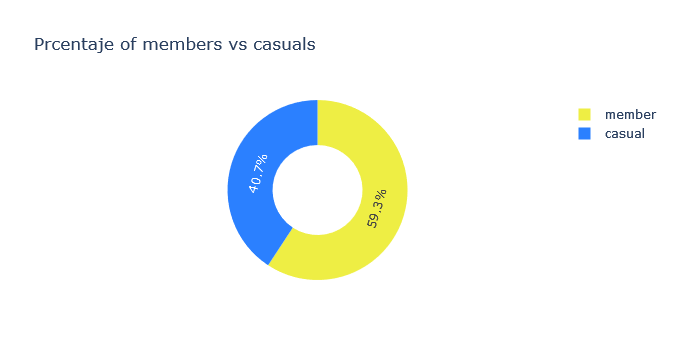

In [27]:
fig_2 = round(df1.groupby('member_casual', as_index=False).count())

fig_2 = px.pie(fig_2, values='ride_id', names='member_casual', title='Percentaje of members vs casuals', 
              hole=.5,
              color = ['member', 'casual'],
              color_discrete_map = {'member': '#2b80ff', 'casual': '#eeee44'},
              labels={'member_casual':'Type of membership'}
              )
fig_2.show()

The rides are split almost 60/40 between members and casuals.

* Members have 3.340.335 trips

* Users have 2.296.806 trips

For a grand total of 5.637.141 trips. 

The following graph is the number of rides by type of bike and type of membership:


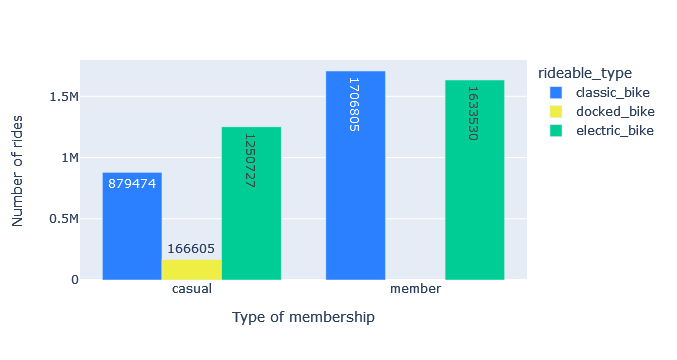

In [89]:
# Type of ride 
fig_3a = round(df1.groupby(['rideable_type','member_casual'], as_index=False).count())

px.bar(fig_3a, x = 'member_casual', y = 'ride_id',
       color = 'rideable_type',
       barmode='group',
       labels = {'ride_id': 'Number of rides', 'member_casual': 'Type of membership'},
       color_discrete_map = {'classic_bike': '#2b80ff', 'docked_bike': '#eeee44'},
       text = 'ride_id'
      )

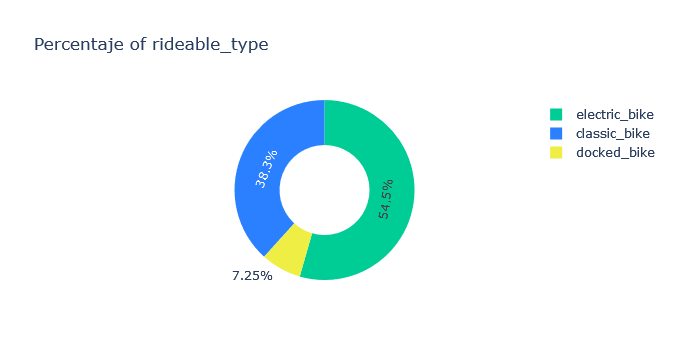

In [121]:
fig_3b = fig_3a = round(df1.groupby(['rideable_type','member_casual'], as_index=False).count())
fig_3b = fig_3b[fig_3b['member_casual'] == 'casual']

fig_3b = px.pie(fig_3b, values='ride_id', names='rideable_type', title='Percentaje of rideable_type', 
              hole=.5,
              color = ['classic_bike', 'docked_bike', 'electric_bike'],
              color_discrete_map = {'classic_bike': '#2b80ff', 'docked_bike': '#eeee44'},
              labels={'rideable_type':'Type of ride'}
              )
fig_3b.show()

Here we can see that for members the use of electrical bikes is almost the same a a classic bikes, but more importantly the casual uses electric rides in 54%. Also all the docked bikes are driven by casual riders.

That insight can be used to incentivise conversion from casual to members. 

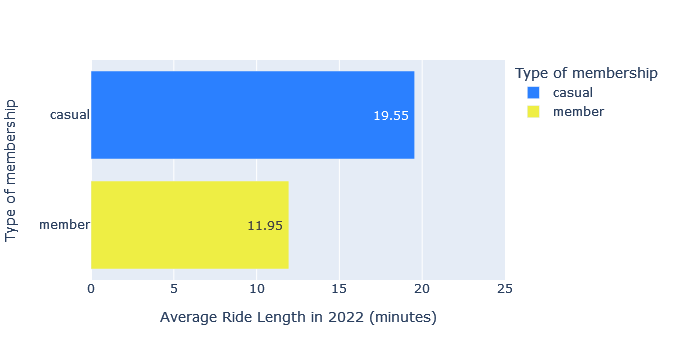

In [29]:
# Average Ride Length
fig_3 = round(df1.groupby('member_casual', as_index=False).mean(),2)

px.bar(fig_3, y = 'member_casual', x = 'ride_length', range_x = [0,25],
        color = 'member_casual', 
        height = 300,
        text = 'ride_length', 
        labels = {'ride_length': 'Average Ride Length in 2022 (minutes)', 'member_casual': 'Type of membership'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'ride_length': True}, 
        color_discrete_map = {'casual': '#2b80ff', 'member': '#eeee44'})

This graph shows average time of individual trips. Casual riders take almost twice of the time compared to members.

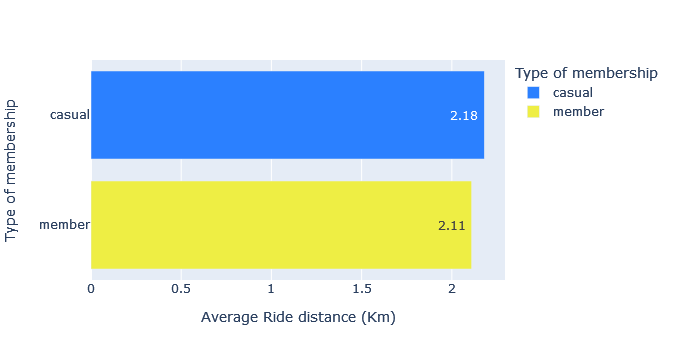

In [30]:
# Average Ride distance in 2022
fig_4 = round(df1.groupby('member_casual', as_index=False).mean(),2)

px.bar(fig_4, y = 'member_casual', x = 'distance_km', 
        color = 'member_casual', 
        height = 300,36
        text = 'distance_km', 
        labels = {'distance_km': 'Average Ride distance (Km)', 'member_casual': 'Type of membership'},
        hover_name = 'member_casual', hover_data = {'member_casual': False}, 
        color_discrete_map = {'casual': '#2b80ff', 'member': '#eeee44'})

Member and casual riders travel on average very similar distances around 2.14 km.

# Analysis by month

From April to October there is a step increase in trips, this can be explained by seasonality. Winter months are not as appealing as summer ones for riding a bike.

Note that members´ curve increases in August, the same pattern does not happen with casuals. 

Because we do not have any way of determining if a casual ride is done by a tourist or local, it is not conclusive to explain trends.

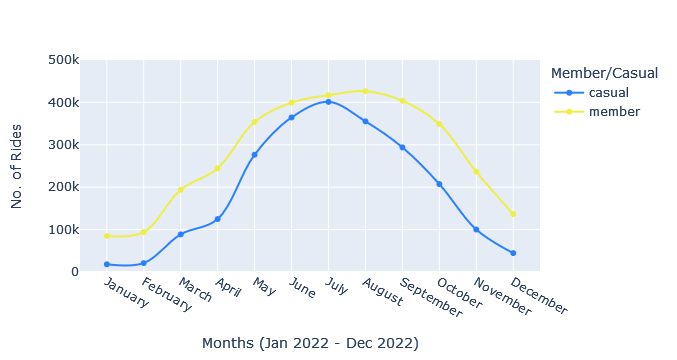

In [31]:
# of rides by month
fig_4 = df1.groupby(['year', 'month', 'member_casual'], as_index=False).count()

px.line(fig_4, x = 'month', y = 'ride_id', range_y = [0,500000],
        color = 'member_casual', 
        line_shape = 'spline',
        markers=True, 
        labels = {'ride_id': 'No. of Rides', 'month': 'Months (Jan 2022 - Dec 2022)', 'member_casual': 'Member/Casual'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'month': True, 'ride_id': True}, 
        color_discrete_map = {'casual': '#2b80ff', 'member': '#eeee44'})

The next graph shows the average time by ride, members show fairly similar values throughout the entire year ranging from 13.5 minutes in June to 9.73 minutes in December.

On the other hand, casuals change from 22.53 minutes in may to 11.72 minutes in December. 

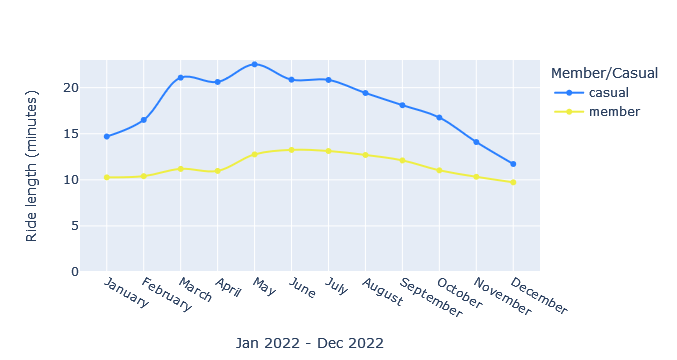

In [71]:
#average ride length by month
fig_5 = round(df1.groupby(['year', 'month', 'member_casual'], as_index=False).mean(),2)

px.line(fig_5, x = 'month', y = 'ride_length', 
        color = 'member_casual', 
        line_shape = 'spline',
        markers=True, 
        range_y = [0,23],
        labels = {'ride_length': 'Ride length (minutes)', 'month': 'Jan 2022 - Dec 2022', 'member_casual': 'Member/Casual'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'month': True, 'ride_length': True}, 
        color_discrete_map = {'casual': '#2b80ff', 'member': '#eeee44'})

This is the speed chart. November shows increased speed. It is a trend that needs more investigation.

Is clear, that casuals are not in a hurry.


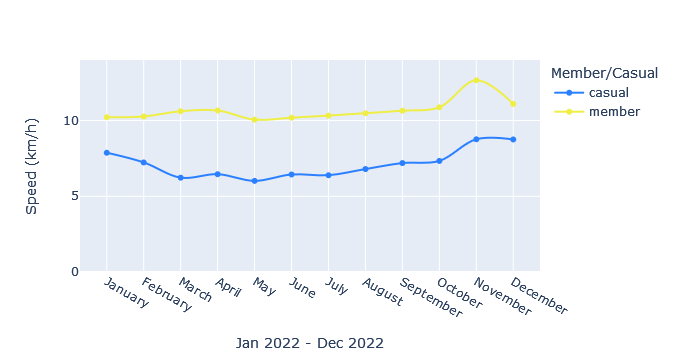

In [70]:
#speed by month
fig_6 = round(df1.groupby(['year', 'month', 'member_casual'], as_index=False).mean(),2)
fig_6['Speed']= fig_6['distance_km']/fig_6['ride_length']*60
px.line(fig_6, x = 'month', y = 'Speed', 
        color = 'member_casual', 
        line_shape = 'spline',
        range_y = [0,14],
        markers=True, 
        labels = {'Speed': 'Speed (km/h)', 'month': 'Jan 2022 - Dec 2022', 'member_casual': 'Member/Casual'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'month': True, 'Speed': True}, 
        color_discrete_map = {'casual': '#2b80ff', 'member': '#eeee44'})

# Weekly  analysis

The next graph shows the number of trips per day of the week.

One very important insight is that casuals surpassed members on Saturday and are nearly the same on Sunday. That can give us clues for marketing tactics.  

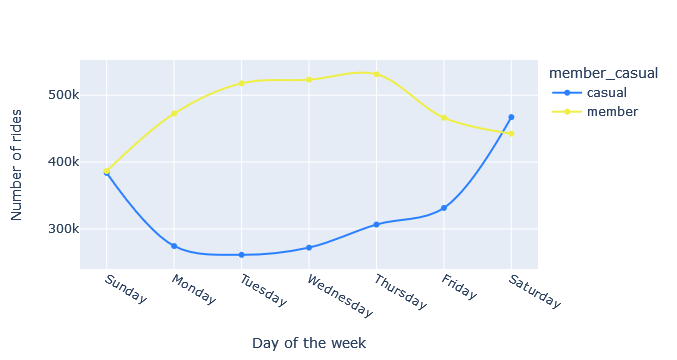

In [34]:
# Number of rides by day
fig_7 = df1.groupby(['day_of_week','member_casual'], as_index=False)['hour'].count()
fig_7 = px.line(fig_7, x = 'day_of_week', y = 'hour',
                 color = 'member_casual',
                 line_shape = 'spline',
                 markers=True,
                 labels = {'ride_id': 'No. of Rides', 'hour': 'Number of rides', 'day_of_week': 'Day of the week'},
                 color_discrete_map = {'casual': '#2b80ff', 'member': '#eeee44'})
fig_7.update_xaxes(dtick=1)
fig_7.show()

This chart shows the average distance traveled by weekday.

There is a trend that on Wednesday distance increases for members and casuals. Even though the difference is not very big, goes from 2.04 on Monday to 2.19 on Wednesday, which is noticeable. 

There are not any conclusions that can be obtained from this data and requires more exploration. 

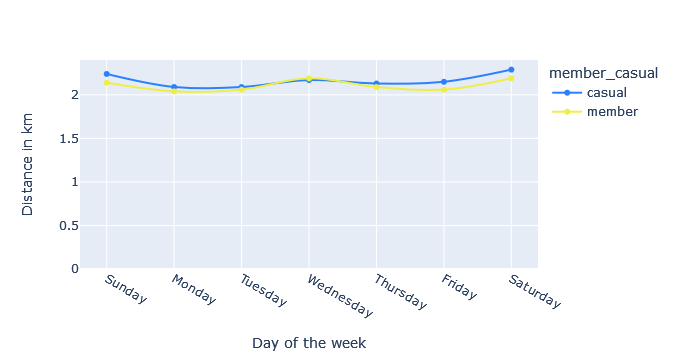

In [69]:
# Average Ride distance by day
fig_9 = round(df1.groupby(['day_of_week','member_casual'], as_index=False)['distance_km'].mean(),2)
fig_9 = px.line(fig_9, x = 'day_of_week', y = 'distance_km',
                 color = 'member_casual',
                 range_y = [0,2.4],
                 line_shape = 'spline',
                 markers=True,
                 labels = {'distance_km': 'Distance in km', 'hour': 'Number of trips', 'day_of_week': 'Day of the week'},
                 color_discrete_map = {'casual': '#2b80ff', 'member': '#eeee44'})
fig_9.update_xaxes(dtick=1)
fig_9.show()

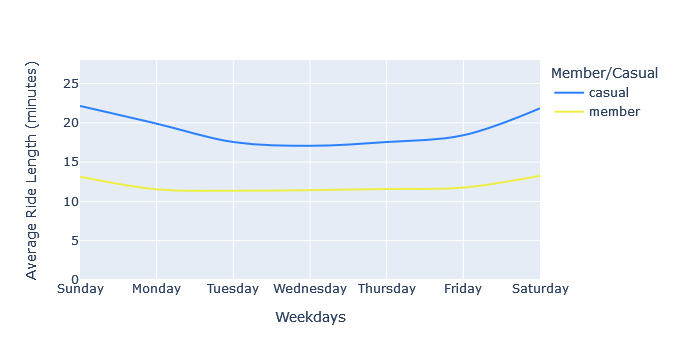

In [61]:
# Average Ride Length (day)
fig_10 = round(df1.groupby(['day_of_week', 'member_casual'], as_index=False).mean(),2)

px.line(fig_10, x = 'day_of_week', y = 'ride_length', range_y = [0,28],
        color = 'member_casual',
        line_shape = 'spline',
        labels = {'ride_length': 'Average Ride Length (minutes)', 'member_casual': 'Member/Casual', 'day_of_week': 'Weekdays'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'ride_length': True}, 
        color_discrete_map = {'casual': '#2b80ff', 'member': '#eeee44'})

The differences in time throughout the week between casuals and members are maintained and even increase on weekends.

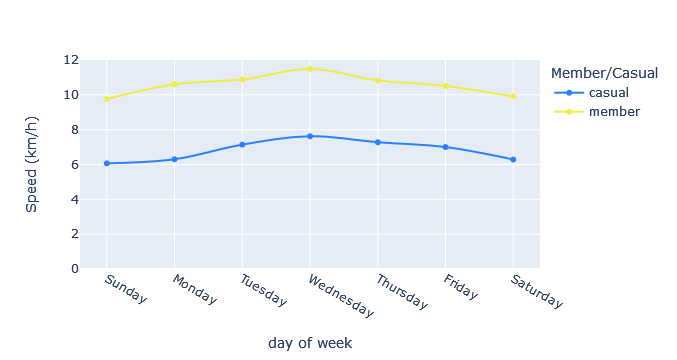

In [72]:
#speed by week
fig_11 = round(df1.groupby(['year', 'day_of_week', 'member_casual'], as_index=False).mean(),2)
fig_11['Speed']= fig_11['distance_km']/fig_11['ride_length']*60
px.line(fig_11, x = 'day_of_week', y = 'Speed', 
        color = 'member_casual', 
        line_shape = 'spline',
        range_y = [0,12],
        markers=True, 
        labels = {'Speed': 'Speed (km/h)', 'day_of_week': 'day of week', 'member_casual': 'Member/Casual'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'day_of_week': True, 'Speed': True}, 
        color_discrete_map = {'casual': '#2b80ff', 'member': '#eeee44'})

This graph shows speed by weekday. Members are not slowing down their bikes they conserve that difference all week. Wednesdays are the fastest days.

# Daily analysis

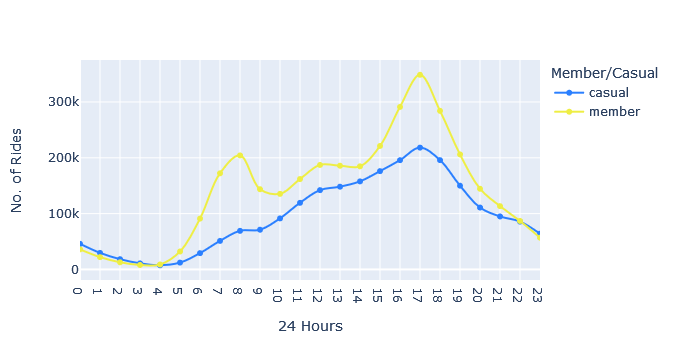

In [39]:
#Number of trips by hour
fig_12 = df1.groupby(['hour', 'member_casual'], as_index=False).count()

fig_12 = px.line(fig_12, x = 'hour', y = 'ride_id', range_x = [0,23], 
                 color = 'member_casual',
                 line_shape = 'spline',
                 markers=True,
                 labels = {'ride_id': 'No. of Rides', 'hour': '24 Hours', 'member_casual': 'Member/Casual'},
                 hover_name = 'member_casual', hover_data = {'member_casual': False, 'month': False, 'ride_id': True},
                 color_discrete_map = {'casual': '#2b80ff', 'member': '#eeee44'})
fig_12.update_xaxes(dtick=1)
fig_12.show()

Between 7 to 9 AM and 3 to 7 pm, members have peak hours. Note that the evening peak hour is nearly 40% higher than the morning peak hour.

For casuals, its growth curve is less dramatic and has the same peak hours in the evening.

In [66]:
# Average Ride distance by hour
fig_13 = round(df1.groupby(['hour', 'member_casual'], as_index=False).mean(),2)

fig_13 = px.line(fig_13, x = 'hour', y = 'distance_km', range_x = [0,23], range_y = [0,2.4],
                 color = 'member_casual',
                 line_shape = 'spline',
                 markers=True,
                 labels = {'ride_id': 'No. of Rides', 'distance_km': 'Distance (km) ', 'Membership Type': 'Member/Casual'},
                 color_discrete_map = {'casual': '#2b80ff', 'member': '#eeee44'})
fig_13.update_xaxes(dtick=1)
fig_13.show()

The average distance peaks at 4 am, but is not a big difference. The shortest value is 1,98 km at 8 PM, and 2,36 km at 4 am.

What this shows is that there are differences but distances are consistent through the day.

The speed trend of faster members than casuals through the whole day also can be explained by their overall health condition. But this is a possible explanation, information is not conclusive.

In [67]:
fig_14 = round(df1.groupby(['hour', 'member_casual'], as_index=False).mean(),2)
fig_14['Speed']= fig_14['distance_km']/fig_14['ride_length']*60
px.line(fig_14, x = 'hour', y = 'Speed', 
        color = 'member_casual', 
        line_shape = 'spline',
        range_y = [0,14],
        markers=True, 
        labels = {'Speed': 'Speed (km/h)', 'member_casual': 'Member/Casual'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'Speed': True},
        color_discrete_map = {'casual': '#2b80ff', 'member': '#eeee44'})


In [68]:
#average distance by month
fig_15 = round(df1.groupby(['year', 'month', 'member_casual'], as_index=False).mean(),2)

px.line(fig_15, x = 'month', y = 'distance_km', 
        color = 'member_casual', 
        line_shape = 'spline',
        range_y = [0,2.3],
        markers=True, 
        labels = {'distance_km': 'Distance (km)', 'month': 'Jan 2022 - Dec 2022', 'member_casual': 'Member/Casual'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'month': True, 'distance_km': True}, 
        color_discrete_map = {'casual': '#2b80ff', 'member': '#eeee44'})


# Heath maps

The coordinates of each station differ and create a lot of combinations, to group those unique combinations, a new column is created joining latitude and longitude:

In [43]:
#Create 2 new columns joining lat and long
df1['start_coordinates'] = df1['start_lat'].astype(str) + ' ' + df1['start_lng'].astype(str)
df1['end_coordinates'] = df1['end_lat'].astype(str) + ' ' + df1['end_lng'].astype(str)

The next step is to create a dataframe with counts of the station's coordinates and group by day_of_week and type of member. In order to understand the trends of use by day of the week. This is done with a pivot table:

In [44]:
df_end_coordinates = pd.pivot_table(df1,
                     index = ["day_of_week", "member_casual", "end_coordinates"],               
                     values = ["ride_id"],
                     aggfunc = 'count')
df_end_coordinates = df_end_coordinates.reset_index()  #pivot needs to reset indexes to handle data
df_end_coordinates.rename(columns = {'ride_id':'count'}, inplace = True) #rename ride_id to reflect that is a agregation with counts
df_end_coordinates.drop(df_end_coordinates[ df_end_coordinates['count'] == 0 ].index, inplace = True) # drop count values of 0
df_end_coordinates[['end_lat','end_lng']] = df_end_coordinates.end_coordinates.str.split(expand=True) #split end_cordinates into lat y lng
df_end_coordinates.drop(['end_coordinates'], axis=1, inplace=True) #drop column of 'lat+lng' that is not needed
df_end_coordinates = df_end_coordinates.astype({"end_lat":'float64', "end_lng":'float64'}) #change lat and longitud to float
df_end_coordinates = df_end_coordinates.reset_index()  #Reset indexes again
df_end_coordinates.drop(['index'], axis=1, inplace=True) #drop index

This is how the dataframe looks:

In [45]:
df_end_coordinates.tail()

,day_of_week,member_casual,count,end_lat,end_lng
21323,Saturday,member,1,42.08,-87.69
21324,Saturday,member,1,42.08,-87.70
21325,Saturday,member,2,42.08,-87.71
21326,Saturday,member,1,42.12,-87.74
21327,Saturday,member,1,42.13,-87.86


This is the heatmap for end stations:

In [88]:
fig_18 = px.density_mapbox(df_end_coordinates, lat = 'end_lat', lon = 'end_lng', z = 'count',
                           radius = 7,
                           title ='End Stations',
                           center = dict(lat = 41.9, lon = -87.62),
                           zoom = 11, mapbox_style = 'carto-positron')
fig_18.show()

This is the heatmap for casual members on weekends

In [47]:
weekend = ['Saturday', 'Sunday'] 
df_end_coordinates_casual_weekend = df_end_coordinates[(df_end_coordinates['member_casual'] == 'casual') &
                                                df_end_coordinates['day_of_week'].isin(weekend)]

In [81]:
fig_19 = px.density_mapbox(df_end_coordinates_casual_weekend, lat = 'end_lat', lon = 'end_lng', z = 'count',
                           radius = 7,
                           title ='Start Stations for casual members on weekends',
                           center = dict(lat = 41.9, lon = -87.62),
                           zoom = 11, mapbox_style = 'carto-positron')

fig_19.show()

Comparing end stations for members vs. casuals, members' arrival stations are more spread out around downtown Chicago, while those for casuals are more centered around a few stations.

Because casual members use a lot more bikes on weekends is very useful to understand the most popular stations.

This is the  pattern of use by casual members on weekdays:

In [49]:
#filter dataframe by casual user on weedays
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
df_end_coordinates_member_weekdays = df_end_coordinates[(df_end_coordinates['member_casual'] == 'casual') &
                                                df_end_coordinates['day_of_week'].isin(weekdays)]

In [79]:
fig_20 = px.density_mapbox(df_end_coordinates_member_weekdays, lat = 'end_lat', lon = 'end_lng', z = 'count',
                           radius = 7,
                           title ='Start Stations for casuals on weekdays',
                           center = dict(lat = 41.9, lon = -87.62),
                           zoom = 11, mapbox_style = 'carto-positron')

fig_20.show()

In [83]:
df_end_stations = pd.pivot_table(df1,
                     index = [ "member_casual", "end_station_name"],               
                     values = ["ride_id"],
                     aggfunc = 'count')
df_end_stations = df_end_stations.reset_index()  #pivot needs to reset indexes to handle data
df_end_stations.rename(columns = {'ride_id':'count'}, inplace = True) #rename ride_id to reflect that is a agregation with counts
df_top = df_end_stations.nlargest(n=50, columns=['count']) # extract top stations
df_top = df_top[df_top['end_station_name'] != 'Not available'] #drop not available records
weekend = ['Saturday', 'Sunday'] 
df_top = df_top[(df_top['member_casual'] == 'casual')] # filter casual members
#& df_top['day_of_week'].isin(weekend)] #select weekends
df_top = df_top.reset_index() 
df_top.drop(['index'], axis=1, inplace=True) #reset index

In [87]:
df_top

,member_casual,end_station_name,count
0,casual,Streeter Dr & Grand Ave,58957
1,casual,DuSable Lake Shore Dr & Monroe St,29166
2,casual,Millennium Park,26228
3,casual,Michigan Ave & Oak St,26051
4,casual,DuSable Lake Shore Dr & North Blvd,25851
5,casual,Theater on the Lake,19156
6,casual,Shedd Aquarium,18478
7,casual,Wells St & Concord Ln,15426
8,casual,Clark St & Armitage Ave,13764
9,casual,Clark St & Lincoln Ave,13498


Streeter Dr & Grand Ave with 58957 rides and DuSable Lake Shore Dr & Monroe St with 29166 rides are the arrival stations.

In [86]:
px.bar(df_top, x = 'count', y = 'end_station_name' ,
        #color = 'day_of_week',
        #barmode='group',
        labels = {'end_station_name': 'Arrival station', 'count': 'Number of trips'},
        color_discrete_map = {'casual': '#2b80ff'})

# Share

The original question to answer is:

>How annual and casual riders use Cyclistic differently?


To answer that question, these are the key findings from the analysis:

* Casuals use **54% of e-bikes** compared with **48% of members**
* Casuals have about **50% less speed**
* From April to july there is **70 % increase in trips** amking summer months the busiest of the year
* The distance traveled between casuals and members is very similar around **2 km**
* Casuals prefer to use bikes on **weekends** members on weekdays
* At **5PM** is peak hour for casuals and members but members have another peak hour at 8AM
* The final destinations of the casuals are more focused on less stations. 

Top 3 end stations are:

- **Clark St & Lincoln Ave, Clark St & Armitage Ave**
- **Wells St & Concord Ln**
- **Shedd Aquarium**


From the data obtained is not possible to establish customer profiles to better target the marketing strategy. There is a central consideration and that is how many casual riders are tourists. Because Cyclistic cannot convert casual riders into members if they don´t live in Chicago.

The final audience of this analysis is the Cyclistic executive team. This analysis assumes that they want to increase sales and lower the risk associated with a bad marketing strategy.

This analysis will show key findings in a graphic presentation.


# Act


Based on this analysis there are 3 recommendations

* 1. Create a membership specific to casual riders
* 2. Focus marketing campaigns on the most used stations by casuals
* 3. Offer incentives 


# 1. Create membership specific to convert casual riders
Casual riders show a different pattern of use, Cyclistic can offer a membership that will work just on weekends and non-peak morning hours on weekdays. That membership will need at least a monthly commitment and it needs to be priced cheaper than using just single rides and full-day passes. That mebership also will include some preferencial price for electric bikes use.

# 2. Focus marketing campaigns on the most used stations by casuals
Casual riders preferred end destinations are very centralized. so, marketing campaigns should be focused on those locations. The marketing campaing should include content about exploring the city, and "enjoy the ride" or "Chicago 2-Wheel Guide"

# 3. Offer incentives
Casual riders like to go to downtown Chicago, apparently for leisure, consequently there is a strong possibility to convert them into members offering discounts on nearby restaurants, venues, and summer events.


